In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
df=pd.read_csv('loan payments data.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [2]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,female


In [3]:
df['loan_status'].value_counts()

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64

In [4]:
df.groupby('loan_status').size()

loan_status
COLLECTION            100
COLLECTION_PAIDOFF    100
PAIDOFF               300
dtype: int64

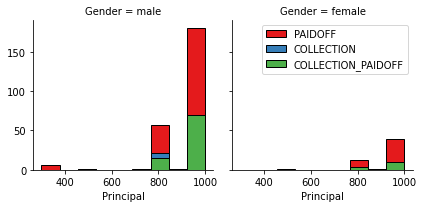

In [5]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

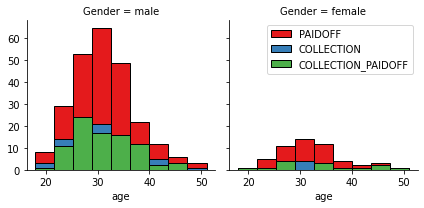

In [6]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

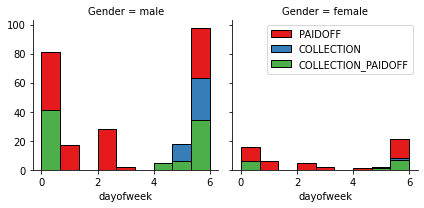

In [7]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [8]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,dayofweek,weekend
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,male,3,0
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,female,3,0
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,female,3,0
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,male,3,0
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,female,4,1


In [9]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status       
female  PAIDOFF               0.688312
        COLLECTION_PAIDOFF    0.181818
        COLLECTION            0.129870
male    PAIDOFF               0.583924
        COLLECTION            0.212766
        COLLECTION_PAIDOFF    0.203310
Name: loan_status, dtype: float64

In [10]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,dayofweek,weekend
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,0,3,0
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,1,3,0
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,1,3,0
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,0,3,0
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,1,4,1


In [11]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status       
Bechalor              PAIDOFF               0.611940
                      COLLECTION_PAIDOFF    0.223881
                      COLLECTION            0.164179
High School or Below  PAIDOFF               0.588517
                      COLLECTION            0.234450
                      COLLECTION_PAIDOFF    0.177033
Master or Above       PAIDOFF               0.750000
                      COLLECTION            0.250000
college               PAIDOFF               0.604545
                      COLLECTION_PAIDOFF    0.218182
                      COLLECTION            0.177273
Name: loan_status, dtype: float64

In [12]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,50,1,Bechalor
2,1000,30,33,1,Bechalor
3,1000,15,27,0,college
4,1000,30,28,1,college


In [13]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


In [14]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


In [15]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [16]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49337687,  0.89789115,  2.28404253, -0.42665337, -1.18484014,
        -0.39336295,  1.17997648, -0.88640526],
       [ 0.49337687,  0.89789115,  3.10658738,  2.34382305, -1.18484014,
         2.54218146, -0.84747452, -0.88640526],
       [ 0.49337687,  0.89789115,  0.3099349 ,  2.34382305, -1.18484014,
         2.54218146, -0.84747452, -0.88640526],
       [ 0.49337687, -0.97897162, -0.67711892, -0.42665337, -1.18484014,
        -0.39336295, -0.84747452,  1.12815215],
       [ 0.49337687,  0.89789115, -0.51260995,  2.34382305,  0.84399572,
        -0.39336295, -0.84747452,  1.12815215]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

training_accuracy=[]
test_accuracy=[]

for n_neighbors in range(1,21):
    model=KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    training_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))
    
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.6325 0.56


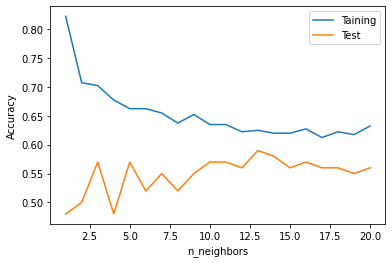

In [18]:
plt.plot(range(1,21),training_accuracy,label='Taining')
plt.plot(range(1,21),test_accuracy,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [19]:
n_neighbors=11
model=KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train,y_train)
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.635 0.57


In [20]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)
model_tree=DecisionTreeClassifier(criterion='entropy',max_depth = 5)
model_tree.fit(X_train,y_train)

print(model_tree.score(X_train,y_train),model_tree.score(X_test,y_test))

0.635 0.57


In [21]:
from sklearn import svm

SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
print(SVM_model.score(X_train,y_train),model_tree.score(X_test,y_test))

0.615 0.57


In [22]:
from sklearn.linear_model import LogisticRegression

trial=100
accuracy_mean=np.zeros((trial-1))

for i in range(1,trial):
    LR_model = LogisticRegression(C=i/100).fit(X_train,y_train)
    y_pred_LR = LR_model.predict(X_test)
    accuracy_mean[i-1]=np.mean(y_pred_LR==y_test);
    
print(accuracy_mean)

[0.57 0.57 0.57 0.57 0.55 0.56 0.56 0.56 0.55 0.55 0.55 0.55 0.55 0.55
 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.55 0.55 0.55
 0.55 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56
 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56
 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56
 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56
 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56
 0.56]


In [23]:
LR_model = LogisticRegression(C=0.06).fit(X_train,y_train)
y_pred_LR = LR_model.predict(X_test)
y_pred_LR

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
     

In [24]:
from sklearn.metrics import jaccard_score, f1_score, log_loss

In [25]:
test_df=pd.read_csv('loan payments data.csv')
test_df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [26]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


In [27]:
test_X = test_Feature
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[ 0.49337687,  0.89789115,  2.28404253, -0.42665337, -1.18484014,
        -0.39336295,  1.17997648, -0.88640526],
       [ 0.49337687,  0.89789115,  3.10658738,  2.34382305, -1.18484014,
         2.54218146, -0.84747452, -0.88640526],
       [ 0.49337687,  0.89789115,  0.3099349 ,  2.34382305, -1.18484014,
         2.54218146, -0.84747452, -0.88640526],
       [ 0.49337687, -0.97897162, -0.67711892, -0.42665337, -1.18484014,
        -0.39336295, -0.84747452,  1.12815215],
       [ 0.49337687,  0.89789115, -0.51260995,  2.34382305,  0.84399572,
        -0.39336295, -0.84747452,  1.12815215]])

In [28]:
test_y = test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [29]:
KNN_pred_test = model.predict(test_X)
K_J_Scr=jaccard_score(test_y, KNN_pred_test,average='weighted')
K_F_Scr=f1_score(test_y, KNN_pred_test, average='weighted')
print("KNN Jaccard Score: %.3f" % K_J_Scr)
print("KNN F1 Score: %.3f" % K_F_Scr)

KNN Jaccard Score: 0.427
KNN F1 Score: 0.555


In [30]:
DT_pred_test = model_tree.predict(test_X)
D_J_Scr=jaccard_score(test_y, DT_pred_test,average='weighted')
D_F_Scr=f1_score(test_y, DT_pred_test, average='weighted')
print("DT Jaccard Score: %.3f" % D_J_Scr)
print("DT F1 Score: %.3f" % D_F_Scr)

DT Jaccard Score: 0.434
DT F1 Score: 0.569


In [31]:
SVM_pred_test = SVM_model.predict(test_X)
S_J_Scr=jaccard_score(test_y, SVM_pred_test,average='weighted')
S_F_Scr=f1_score(test_y, SVM_pred_test, average='weighted')
print("SVM Jaccard Score: %.3f" % S_J_Scr)
print("SVM F1 Score: %.3f" % S_F_Scr)

SVM Jaccard Score: 0.395
SVM F1 Score: 0.511


In [32]:
LR_pred_test = LR_model.predict(test_X)
L_J_Scr=jaccard_score(test_y, LR_pred_test,average='weighted')
L_F_Scr=f1_score(test_y, LR_pred_test, average='weighted')
print("LR Jaccard Score: %.3f" % L_J_Scr)
print("LR F1 Score: %.3f" % L_F_Scr)

LR_pred_test_prob = LR_model.predict_proba(test_X)
L_L_Scr=log_loss(test_y, LR_pred_test_prob)
print("LR LogLoss Score: %.3f" % L_L_Scr)

LR Jaccard Score: 0.365
LR F1 Score: 0.462
LR LogLoss Score: 0.854


In [33]:
Jaccard = [K_J_Scr,D_J_Scr,S_J_Scr,L_J_Scr]
F1_score = [K_F_Scr,D_F_Scr,S_F_Scr,L_F_Scr]
LogLoss = ['NA','NA','NA',L_L_Scr]

df_report = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1_Score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df_report, columns=['Algorithm', 'Jaccard', 'F1_Score', 'LogLoss'],index=None)
Report

,Algorithm,Jaccard,F1_Score,LogLoss
0,KNN,0.426938,0.554988,NA
1,Decision Tree,0.434467,0.568607,NA
2,SVM,0.395013,0.511270,NA
3,LogisticRegression,0.365149,0.462444,0.854353
